# **EDA of Haberman Dataset**

##**1. Basic Terminology**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###*1.1 Load haberman.csv into a pandas dataFrame.*



In [ ]:
from google.colab import files
files=files.upload()

Saving haberman.csv to haberman (1).csv


In [ ]:
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
haberman.info()

### *1.2 Summary of the dataset*



In [ ]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


### *1.3 Data-points and features*

In [ ]:
print (haberman.shape)

(306, 4)


### *1.4 Column names in our dataset*

In [ ]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


### *1.5 Data points for each class*

In [ ]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Summary:

* This dataset contains information on survival rate of cancer patients. 

* File contains four columns, three features and one class column:

  * age - Age of patient

  * year - Year of operation

  * nodes - Positive Lymph Nodes

  * status - Patient survived more than 5 years, class 2 - patient survived less than 5 years

* Haberman is an unbalanced dataset as the number of datapoints vary by a huge margin i.e 75%. It is visible that the data is skewed in favour of survivors which is status = 1.

* We also deduce from the dataset that columns age, year and nodes are independent variable and column status is dependent. 

* There are no null values in the dataset.

### *1.6 Changing "status" into categorical variable.*

Just to avoid confusion, changing the data in the status column. Changging 1=survived more than 5 years and 2=survived less than 5 years.

In [ ]:
haberman['status'].replace({1: "Survived more than 5 years", 2: "Survived less than 5 years"})

0      Survived more than 5 years
1      Survived more than 5 years
2      Survived more than 5 years
3      Survived more than 5 years
4      Survived more than 5 years
                  ...            
301    Survived more than 5 years
302    Survived more than 5 years
303    Survived more than 5 years
304    Survived less than 5 years
305    Survived less than 5 years
Name: status, Length: 306, dtype: object

##**2. Exploratory Data Analysis**
1. Univariate Analysis (PDF, CDF, Boxplot, Voilin plots)
2. Bivariate Analysis (scatter plots, pair-plots)
3. Multivariate Analysis (contour plot)

### *2.1 2-D Scatter Plots*

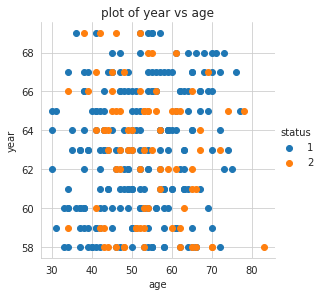

In [ ]:
#2-D scatter plot:

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('plot of year vs age')   
plt.show();


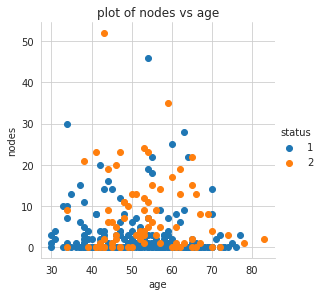

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('plot of nodes vs age')
plt.show();

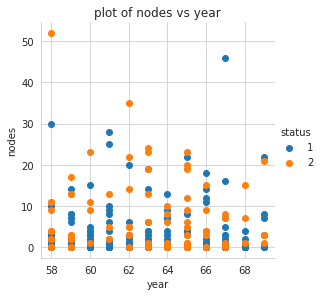

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title('plot of nodes vs year')
plt.show();

Conclusions:

* There is considerable overlap between Year and Age so its difficult to make sense of the scatter plot.
* We can see some distinction between nodes and age but it is still not sufficient to conclude anything.
* seperating two groups is difficult.


### *2.2 Pair Plot*

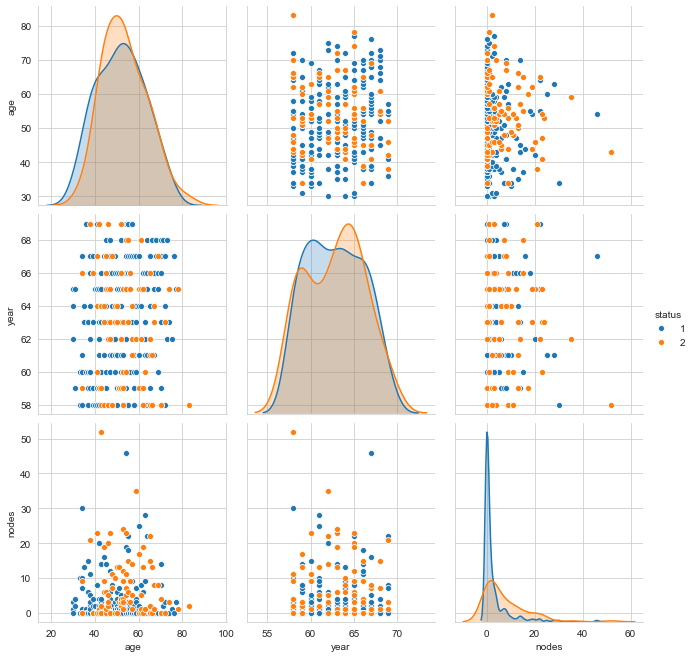

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.show()

Conclusions:
- The given dataset is not lineraly separable from each class. 
- There is too much overlapping in the data-points and hence cannot be separated by a straight line.
- We cannot build a simple model to determine the survival rate.
- One reason for the inconclusive nature of plot can be the imbalanced dataset.

### *2.3 Histograms*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


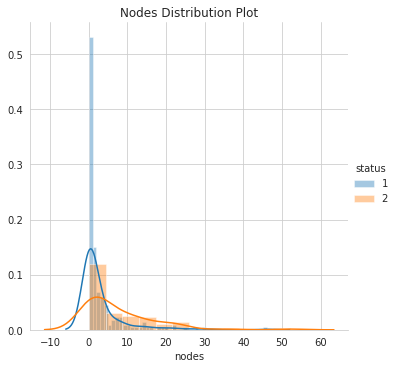

In [49]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Nodes Distribution Plot')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


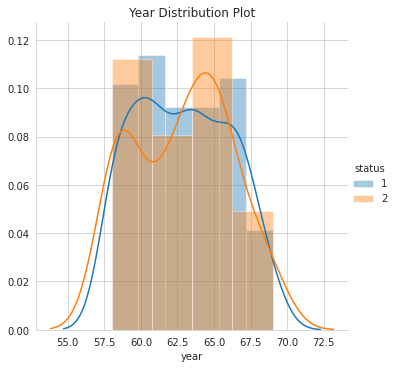

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Year Distribution Plot')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


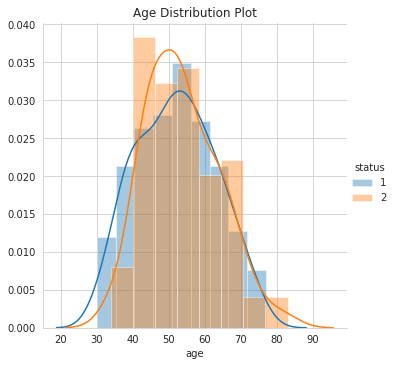

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Age Distribution Plot')
plt.show();

Conclusions:
* The variables year and age do not provide any significant insight to classify the data.
* It is evident from the nodes plot that patients having less then 1 auxillary nodes have higher chance of survival compared to patients who have more than 1 nodes. 

### *2.4 Box Plots and Whiskers*

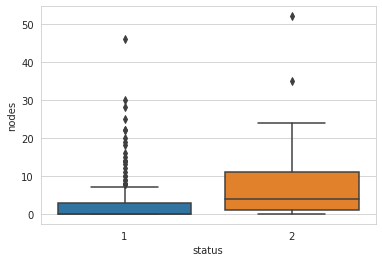

In [50]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

Conclusions:
* It is understood from the plot that when patients have nodes more than 5, the chance of their survival decreases drastically. 

###*2.5 Violin Plot*

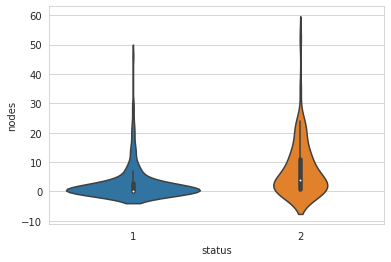

In [ ]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

###*2.6 Contour Plot*

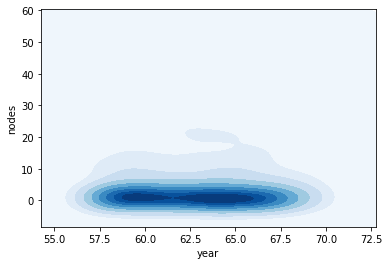

In [ ]:
sns.kdeplot(x=haberman.year, y=haberman.nodes, cmap="Blues", shade=True, thresh=0)
plt.show()

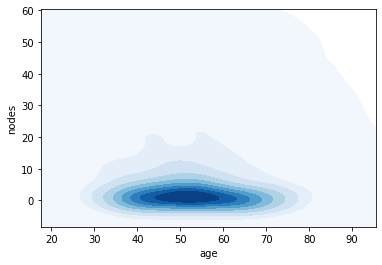

In [ ]:
sns.kdeplot(x=haberman.age, y=haberman.nodes, cmap="Blues", shade=True, thresh=0)
plt.show()

##*3 Final Conclusions*

* Number of Auxillary nodes is the only independent variable that helps to understand survival of patients after operation.
* Haberman is an unbalanced dataset as the number of datapoints vary by a huge margin i.e 75%. It is visible that the data is skewed in favour of survivors which is status = 1.
* Patients who have 1 or less than 1 auxillary node have high survival chance. 